# Project description - 'What sells a car?'


You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.


# Contents <a id='back'></a>
* [1. Data overview](#intro)


* [2. Data exploration](#data_exploration)
    * 2.1. Missing values
    * 2.2. Fix data types
    * 2.3. Duplicated data
    * 2.4. First conclusions
   

* [3. Data transformation & Categorization](#data_transformation)
    * 3.1. Add day of the week, month and year when the ad was placed
    * 3.2. Add vehicle's age in years when the ad was placed
    * 3.3. Categorization of model column
    * 3.4. Categorization fo condition column based on numeric range
   
* [4. Exploratory Analysis](#exploratory_analysis)
    * 4.1. Check clean data
    * 4.2. Study core parameters
    * 4.3. Study and treat outliers
    * 4.4. Study core parameters without outliers
    * 4.5. Ads lifetime
    * 4.6. Average price per type of vehicle
    * 4.7. Price factors


* [5. General Conclusions](#conclusions)

---

## Data Overview

### **Initialization**

In [1]:
# Loading all the libraries

import pandas as pd
pd.set_option('display.max_columns', None)
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Load data

In [2]:
# Load the data file into a DataFrame
us_cars = pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal


In [3]:
# print the general/summary information about the DataFrame
us_cars.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [4]:
us_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
# print a sample of data

us_cars.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [6]:
#first overview of missing values
us_cars.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

### Conclusions and further steps

<span style="color:green">**Notes from the analyst:** </span> 

* At first glance we can see we have missing values in: `model_year`, `cylinders`, `transmission`, `paint_color` & `is_4wd`. Which is a lot. We will review one by one to see how to address them on next steps

* We will need to address and change the data type of the `date_posted` column, to be able to work with the information dates within 

<span style="color:purple">**Next steps:** </span> 

* Investigate those columns with missing values and address them
    * We already see that `is_4wd` is the columnn with the biggest amount of missing values but we saw the values are 1 or NaN, meaning we might be able to change those NaN values for 0. The column suggest = is 4wd yes/no (1/0)
    
* Understand the weight of our missing values in our dataset and how that can affect our analysis and conclusions

* Check for duplicated values if any

---

## Data exploration

### Treat missing values (if any)

<span style="color:purple">**Actions taken:** </span>

We have 5 columns with missing values. Below describes how we addressed each one of them

1. `paint_color`
1. `is_4wd` 
1. `Model year` 
1. `cylinders` 
1. `odometer` 


In [7]:
# function to calculate the percentage of missing values
def missing_values_table(us_cars):
        # Total missing values
        missing_values = us_cars.isnull().sum()
        
        # Percentage of missing values
        missing_val_percent = 100 * us_cars.isnull().sum() / len(us_cars)
        
        # Make a table with the results
        missing_val_table = pd.concat([missing_values, missing_val_percent], axis=1)
        
        # Rename the columns
        missing_val_table_ren_columns = missing_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        missing_val_table_ren_columns = missing_val_table_ren_columns[
            missing_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(us_cars.shape[1]) + " columns.\n"      
            "There are " + str(missing_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return missing_val_table_ren_columns

In [8]:
# check missing values > count + % from the total dataset
missing_values_table(us_cars)

Your selected dataframe has 13 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
is_4wd,25953,50.4
paint_color,9267,18.0
odometer,7892,15.3
cylinders,5260,10.2
model_year,3619,7.0


#### **Column: `paint_color` & `is_4wd`****

<span style="color:green">**Notes from the analyst:** </span> 

* We can replace missing values from:
    * `is_4wd` -- because is returning a boolean, 1 or nan. We can replace all the NaN values with 0
    * `paint_color` -- we can replace the missing values with 'unknown' since it won't affect our data and we will align the naming values for that column

In [9]:
#4 paint_color
print(us_cars['paint_color'].sort_values().unique())

#amount of missing values from this column
us_cars['paint_color'].isna().sum()

['black' 'blue' 'brown' 'custom' 'green' 'grey' 'orange' 'purple' 'red'
 'silver' 'white' 'yellow' nan]


9267

In [10]:
us_cars['paint_color'] = us_cars['paint_color'].fillna('unknown')

In [11]:
us_cars['paint_color'].isna().sum()

0

In [12]:
#5 is_4wd 
print(us_cars['is_4wd'].sort_values().unique())

#amount of missing values from this column
us_cars['is_4wd'].isna().sum()

[ 1. nan]


25953

In [13]:
us_cars[us_cars['is_4wd'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29


In [14]:
us_cars['is_4wd'] = us_cars['is_4wd'].fillna(0)

In [15]:
#confirming the missing values addressed in this section
us_cars.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

#### **Column: `model_year`**

<span style="color:green">**Notes from the analyst:** </span> 

* Missing values from `model_year` in our dataset is not so big comparing to the whole dataset (7%) 

* Actions taken: 
    * Understanding the relationships between `model` & `model_year`, we will replace the missing values in `model_year` based on the most common year by model. 

In [16]:
# checking missing values left and addressed in this section
missing_values_table(us_cars)

Your selected dataframe has 13 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
odometer,7892,15.3
cylinders,5260,10.2
model_year,3619,7.0


In [17]:
#1 model_year
us_cars['model_year'].sort_values().unique()

array([1908., 1929., 1936., 1948., 1949., 1954., 1955., 1958., 1960.,
       1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969.,
       1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978.,
       1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987.,
       1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996.,
       1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005.,
       2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015., 2016., 2017., 2018., 2019.,   nan])

In [18]:
us_cars['model_year'] = us_cars.groupby(['model'])['model_year'].transform(lambda grp: grp.fillna(grp.mode().max()))

In [19]:
# check missing data
us_cars['model_year'].isna().sum()

0

#### **Column: `cylinders`**

<span style="color:green">**Notes from the analyst:** </span> 

* Now that we have the missing values from `model_year` filled, we will fill the missing values on `cylinders` based on the most common value per `model`


In [20]:
#2 cylinders
print(us_cars['cylinders'].sort_values().unique())

#amount of missing values from this column
us_cars['cylinders'].isna().sum()

[ 3.  4.  5.  6.  8. 10. 12. nan]


5260

In [21]:
us_cars['cylinders'] = us_cars.groupby('model')['cylinders'].transform(lambda grp: grp.fillna(grp.mode().max()))

In [22]:
# check missing data
us_cars['cylinders'].isna().sum()

0

#### **Column: `odometer`**
<span style="color:green">**Notes from the analyst:** </span> 


* *A vehicle's odometer reading is one of the key factors in determining what that vehicle is worth, as it indicates the number of miles a vehicle has traveled. A vehicle with high mileage is worth less than a vehicle with low mileage.

* Knowing this, we understood that the odometer values are important measures and we can't remove them from our dataset. Also, they are still 15% from our dataset


<span style="color:purple">**Actions taken:** </span>

* Since the odometer is connected to the age of the car, we first check the odometer median values based on `year_model`
* We decide to fill missing values in odometer based on the `model_year`, but we will still have 1 missing value = 

In [23]:
# checking missing values left
missing_values_table(us_cars)

Your selected dataframe has 13 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
odometer,7892,15.3


In [24]:
#3 odometer
grouped = us_cars.groupby('model_year')['odometer'].median()
grouped.isna().sum()

print(grouped)

model_year
1908.0    169328.0
1929.0         NaN
1936.0     30000.0
1948.0      4000.0
1949.0      1800.0
            ...   
2015.0     81195.0
2016.0     55931.5
2017.0     41426.0
2018.0     21200.0
2019.0     14151.5
Name: odometer, Length: 68, dtype: float64


In [25]:
#we group model_year because older cars will have a higher median than newer ones
us_cars['odometer'] = us_cars['odometer'].fillna(us_cars.groupby('model_year')['odometer'].transform('median')) 


In [26]:
missing_values_table(us_cars)

Your selected dataframe has 13 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
odometer,1,0.0


In [27]:
us_cars = us_cars.dropna(subset=['odometer'], axis=0)

In [28]:
us_cars['odometer'].describe()

count     51524.000000
mean     115132.391817
std       62084.340077
min           0.000000
25%       73289.000000
50%      113669.000000
75%      152735.750000
max      990000.000000
Name: odometer, dtype: float64

In [29]:
#medians from the dataset
print(us_cars.median()) 

price            9000.0
model_year       2011.0
cylinders           6.0
odometer       113669.0
is_4wd              0.0
days_listed        33.0
dtype: float64


---

### Fix data types

<span style="color:purple">**Action taken:** </span>

 * Changed `date_posted` column to datatime type, so we can extract month, weekday and year separately 

In [30]:
us_cars['date_posted'] = pd.to_datetime(us_cars['date_posted'],format='%Y-%m-%d')

In [31]:
#changed date_posted to datetime
us_cars.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51524 non-null  int64         
 1   model_year    51524 non-null  float64       
 2   model         51524 non-null  object        
 3   condition     51524 non-null  object        
 4   cylinders     51524 non-null  float64       
 5   fuel          51524 non-null  object        
 6   odometer      51524 non-null  float64       
 7   transmission  51524 non-null  object        
 8   type          51524 non-null  object        
 9   paint_color   51524 non-null  object        
 10  is_4wd        51524 non-null  float64       
 11  date_posted   51524 non-null  datetime64[ns]
 12  days_listed   51524 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.5+ MB


In [32]:
#Changing types to int.
us_cars['model_year'] = us_cars['model_year'].astype('int16')
us_cars['cylinders'] = us_cars['cylinders'].astype('int16')
us_cars['is_4wd'] = us_cars['is_4wd'].astype('int16')

In [33]:
us_cars.dtypes

price                    int64
model_year               int16
model                   object
condition               object
cylinders                int16
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                   int16
date_posted     datetime64[ns]
days_listed              int64
dtype: object

---

### Duplicated values (if any)

In [34]:
us_cars.duplicated().sum()

0

### Data exploration -  Conclusions and further steps

On this first part of the analysis we went through the missing values in our dataset and decided the best way to fill them. We concluded:

1. `paint_color` -- fill missing values with 'unkown', since we can't have a pattern to fill the missing colors 
1. `is_4wd` -- fill missing values with 0, as we have a True/Flase kind of column 
1. `Model year` -- fill missing values with most common values of `model_year` by `model`
1. `cylinders` -- fill missing values with most common values by `model`
1. `odometer` -- fill the missing values with the median by `model_year`. We still have 1 missing value for year 1929, since we do not have any value to fill it with. We decided to drop this row. 


On this section we also addressed the data types:

1. Chaged `date_posted` to datatime type
2. Changed `model_year`, `cylinders`, and `is_4wd` to integer data type to avoid decimals. 


In [35]:
us_cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19
1,25500,2013,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,160954.0,automatic,pickup,unknown,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28


---

## Data transformation & categorization

<span style="color:purple">**Action taken:** </span>


* 3.1 Day of the week, month, and year the ad was placed
* 3.2 The vehicle's age (in years) when the ad was placed
* 3.3 The vehicle's average mileage per year
* 3.4 Simplify model column to understand distribution of car brands
* 3.5 In the `condition` column, replace string values with a numeric scale, created a new column `condition_rank` :
   * Project Description 2
   * new = 5
   * like new = 4
   * excellent = 3
   * good = 2
   * fair = 1
   * salvage = 0

### Day of the week, month, and year the ad was placed

In [36]:
us_cars['weekday_posted']=pd.to_datetime(us_cars['date_posted']).dt.weekday

In [37]:
us_cars['month_posted']=pd.to_datetime(us_cars['date_posted']).dt.month

In [38]:
us_cars['year_posted']=pd.to_datetime(us_cars['date_posted']).dt.year

In [39]:
#checking the unique values of our new column to get more context on when the ads where posted
us_cars['year_posted'].unique()

array([2018, 2019])

In [40]:
us_cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018
1,25500,2013,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019
3,1500,2003,ford f-150,fair,8,gas,160954.0,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019


### The vehicle's age (in years) when the ad was placed

* We created a new column with the vehicle's age when the add was places
* We noticed we have values 0 years, we will replace those values with 1, as is possible the ad and the car are from the same year but months apart. We will count those values as 1 year for vehicle's age 


In [41]:
us_cars['vehicle_age'] = us_cars['year_posted'] - us_cars['model_year']

In [42]:
us_cars['vehicle_age'].describe()

count    51524.000000
mean         8.431973
std          6.148532
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64

In [43]:
#replace 0 years for 1 
us_cars['vehicle_age'] = us_cars['vehicle_age'].replace(0.0, 1)

In [44]:
#check the unique values on vehicles age
us_cars['vehicle_age'].sort_values().unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  63,  65,  69,  71,  82,
       110])

### The vehicle's average mileage per year


In [45]:
us_cars['avg_mileage_year'] = us_cars['odometer'] / us_cars['vehicle_age']

In [46]:
us_cars['avg_mileage_year'].describe()

count     51524.000000
mean      18190.555464
std       13256.533741
min           0.000000
25%       10918.071429
50%       15375.000000
75%       21500.000000
max      373200.000000
Name: avg_mileage_year, dtype: float64

### Column `model` simplified - brand car name

* We will create a new column that storage only the brand names of all our cars
* This helps us to better understand our dataset and, besides all the different models, which are the brands that are most popular

In [47]:
us_cars['model'].value_counts().head()

ford f-150                  2795
chevrolet silverado 1500    2171
ram 1500                    1750
chevrolet silverado         1271
jeep wrangler               1119
Name: model, dtype: int64

In [48]:
#create a function to take only the brand name to simplify our visualizations

def brand(row):
    """
    From vehicle model returns the brand name
    """
    
    model = row['model']
    model_split = model.split(' ')
    brand_name = model_split[0]
    return brand_name

In [49]:
us_cars['brand_name'] = us_cars.apply(brand, axis=1)

In [50]:
us_cars['brand_name'].value_counts()

ford             12671
chevrolet        10611
toyota            5445
honda             3485
ram               3316
jeep              3281
nissan            3208
gmc               2378
subaru            1272
dodge             1255
hyundai           1173
volkswagen         869
chrysler           838
kia                585
cadillac           322
buick              271
bmw                267
acura              236
mercedes-benz       41
Name: brand_name, dtype: int64

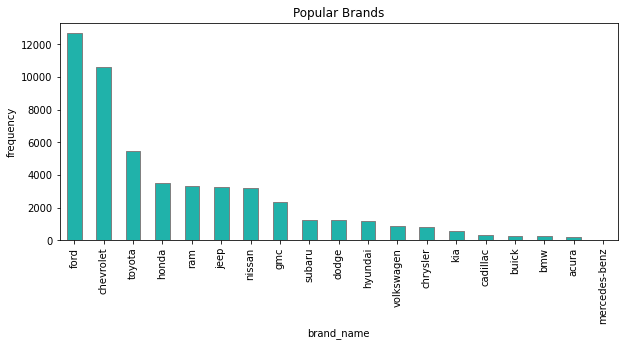

In [51]:
us_cars['brand_name'].value_counts().plot(kind='bar', figsize=(10,4), color='lightseagreen',edgecolor = "gray", grid=False)
plt.title("Popular Brands")
plt.xlabel('brand_name')
plt.ylabel('frequency');

### Categorize `condition` column

In the `condition` column, replace string values with a numeric scale:

   * new = 5
   * like new = 4
   * excellent = 3
   * good = 2
   * fair = 1
   * salvage = 0

In [52]:
def to_numeric_condition(condition):
    if condition =='new':
         return '5'
    elif condition == 'like new':
        return '4'
    elif condition == 'excellent':
        return '3'
    elif condition == 'good':
        return '2'
    elif condition == 'fair':
        return '1'
    else:
        return '0'

us_cars['condition_rank'] = us_cars['condition'].apply(to_numeric_condition)

In [53]:
us_cars['condition_rank'].sort_values().unique()

array(['0', '1', '2', '3', '4', '5'], dtype=object)

In [54]:
us_cars['condition_rank'] = us_cars['condition_rank'].astype('int16')

<AxesSubplot:title={'center':'Distribution of the condition of the cars'}, xlabel='condition_rank'>

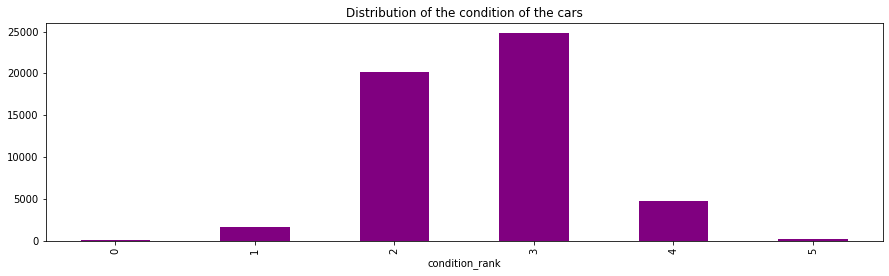

In [55]:
# PLOT CODE:
us_cars.groupby(['condition_rank']).size().plot(
    kind='bar',
    title='Distribution of the condition of the cars',
    figsize=(15,4),     
    color = 'purple'
)


<span style="color:green">**Notes from the analyst:** </span> 

* When we look at our dataset based on the condition, we see that the mayority of our cars are in a good condition and is very low those that are either new or salavage condition

---

## Exploratory Analysis
### Check clean data


In [56]:
# print the general/summary information about the DataFrame
us_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51524 non-null  int64         
 1   model_year        51524 non-null  int16         
 2   model             51524 non-null  object        
 3   condition         51524 non-null  object        
 4   cylinders         51524 non-null  int16         
 5   fuel              51524 non-null  object        
 6   odometer          51524 non-null  float64       
 7   transmission      51524 non-null  object        
 8   type              51524 non-null  object        
 9   paint_color       51524 non-null  object        
 10  is_4wd            51524 non-null  int16         
 11  date_posted       51524 non-null  datetime64[ns]
 12  days_listed       51524 non-null  int64         
 13  weekday_posted    51524 non-null  int64         
 14  month_posted      5152

In [57]:
# print a sample of data
us_cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,avg_mileage_year,brand_name,condition_rank
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.285714,bmw,2
1,25500,2013,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,5,17741.000000,ford,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.333333,hyundai,4
3,1500,2003,ford f-150,fair,8,gas,160954.0,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,10059.625000,ford,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451.500000,chrysler,3


---

### Study core parameters


<span style="color:green">**Notes from the analyst:** </span> 

* We displayed on histograms some of the parameters that we will study deeply in the next sections. 

    - 4.2.1 Price
    - 4.2.2 The vehicle's age when the ad was placed
    - 4.2.3 Mileage
    - 4.2.4 Number of cylinders
    - 4.2.5 Condition

#### Price

* The chart below show is the distribution of the price in our dataset. The distribution is skewed to the right. Big amount of car prices are in the low to medium range of the price. We can see our data contains significant outliers


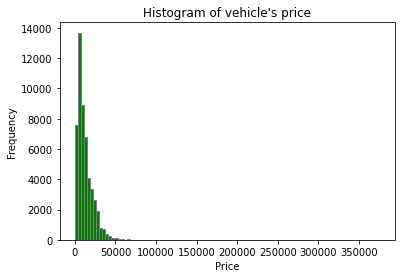

In [58]:
# histogram of vehicle's price
us_cars['price'].hist(bins=100, color='green', edgecolor = "gray", grid=False)

# add title and axis names
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title("Histogram of vehicle's price");

In [59]:
us_cars['price'].describe()

count     51524.00000
mean      12132.35104
std       10040.86718
min           1.00000
25%        5000.00000
50%        9000.00000
75%       16836.00000
max      375000.00000
Name: price, dtype: float64

#### Vehicle's age when the ad was posted

* Looking at our next histogram, we can see the distribution also skewed right as most vechiles fall between 0-20 years. The data ranges are 0 to 110 years with the median around 7 years.
* We can conclude that the data contains significant outliers

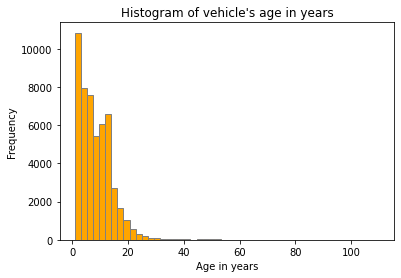

In [60]:
# histogram of vehicle's age in years
us_cars['vehicle_age'].hist(bins=50, color='orange', edgecolor = "gray", grid=False)

# add title and axis names
plt.xlabel('Age in years')
plt.ylabel('Frequency')
plt.title("Histogram of vehicle's age in years");

#### Mileage

* Checking the vehicle's mileage we see the distribution skewed right, with most of our odometer reading between 0 to 200,000. 
* The data ranges from 0 to 990,000 with the median around 113,000. We are looking at data with significant outliers


In [61]:
#average annual mileage added a new column
us_cars['avg_mileage_year'] = round(us_cars['odometer'] / us_cars['vehicle_age'], 2)
#check the dataset
us_cars.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,avg_mileage_year,condition_rank
count,51524.00000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000,51524.000000
mean,12132.35104,2009.875495,6.121458,115132.391817,0.496312,39.554382,3.005376,6.628406,2018.307468,8.474245,18190.555329,2.637548
std,10040.86718,6.135013,1.657292,62084.340077,0.499991,28.204413,1.997735,3.474115,0.461450,6.093608,13256.533731,0.712449
min,1.00000,1908.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,1.000000,0.000000,0.000000
25%,5000.00000,2007.000000,4.000000,73289.000000,0.000000,19.000000,1.000000,3.000000,2018.000000,4.000000,10918.070000,2.000000
50%,9000.00000,2011.000000,6.000000,113669.000000,0.000000,33.000000,3.000000,7.000000,2018.000000,7.000000,15375.000000,3.000000
75%,16836.00000,2014.000000,8.000000,152735.750000,1.000000,53.000000,5.000000,10.000000,2019.000000,12.000000,21500.000000,3.000000
max,375000.00000,2019.000000,12.000000,990000.000000,1.000000,271.000000,6.000000,12.000000,2019.000000,110.000000,373200.000000,5.000000


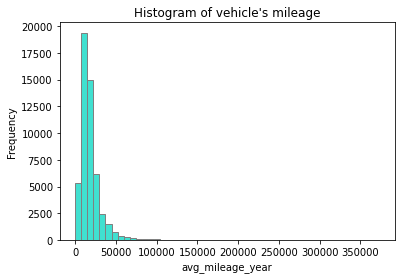

In [62]:
# histogram of vehicle's mileage
us_cars['avg_mileage_year'].hist(bins=50, color='turquoise', edgecolor = "gray", grid=False)

# add title and axis names
plt.xlabel('avg_mileage_year')
plt.ylabel('Frequency')
plt.title("Histogram of vehicle's mileage");

<span style="color:green">**Notes from the analyst:** </span> 

Looking at the three charts above, we conclude the data is skewed right and we have extreme higher values, so we have significant outliers that we will address later on



#### Number of cylinders

* The distribution of the cylinders column range between 3 to maximum 12 cylinders. Most vehicles get represented in 4 to 8 cylinders. There's some outliers, considering our meadian is 6, but is not as extreme as the other parameters checked above. 

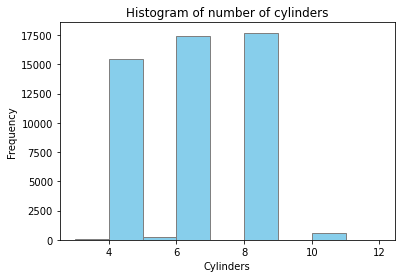

In [63]:
# histogram of number of cylinders
us_cars['cylinders'].hist(bins=9, color='skyblue', edgecolor = "gray", grid=False)

# add title and axis names
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.title("Histogram of number of cylinders");



#### Condition

* We already had an overview of the distribution of the condition category before. Most vehicles fall under good or excellent, with some outliers in the extreme values (new or salvage)

   * new = 5
   * like new = 4
   * excellent = 3
   * good = 2
   * fair = 1
   * salvage = 0



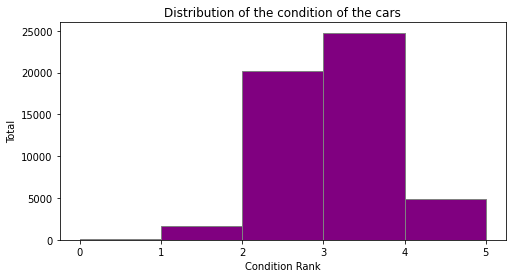

In [64]:
# histogram of number of cylinders
us_cars['condition_rank'].hist(bins=5, color='purple', edgecolor = "gray", grid=False, figsize=(8,4))

# add title and axis names
plt.xlabel('Condition Rank')
plt.ylabel('Total')
plt.title("Distribution of the condition of the cars");



<span style="color:green">**Notes from the analyst:** </span> 

Based on this first visualization, we have several columns with outliers in price, age_in_years, and odometer variables. 

* From price values, we easy detect outliers from incorrect data, considering the minimum value is 1 and the maximum 375,000. 
* Similar happens with the age of the vehicle, our mean is 9, but our maximum vehicle age is 110 years. 

* We will need to remove the outliers before proceeding with the analysis and conclusions

<span style="color:purple">**Next steps:** </span>
* Clean the data from the outliers and create a filtered dataset

### Study and treat outliers


#### Outliers in `price`



In [65]:
#check the value of outlier
Q1_price = us_cars['price'].quantile(0.25)
Q3_price = us_cars['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

#check the lowerbound and upperbound value
lower_price = Q1_price - (1.5*IQR_price)
upper_price = Q3_price + (1.5*IQR_price)

#show the value
print(lower_price)
print(upper_price)


-12754.0
34590.0


In [66]:
#saved data witout outliers
price_new_us_cars = us_cars.query('0 < price < @upper_price')
price_new_us_cars

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,avg_mileage_year,brand_name,condition_rank
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.29,bmw,2
1,25500,2013,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,5,17741.00,ford,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.33,hyundai,4
3,1500,2003,ford f-150,fair,8,gas,160954.0,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,10059.62,ford,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451.50,chrysler,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,2,10,2018,5,17627.20,nissan,4
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,2,11,2018,16,11343.75,honda,0
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,3,11,2018,9,14222.22,hyundai,3
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,0,7,2018,5,27914.60,toyota,2


#### Outliers in `vehicle_age`

In [67]:
#check the value of outlier
Q1_age = us_cars['vehicle_age'].quantile(0.25)
Q3_age = us_cars['vehicle_age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

#check the lowerbound and upperbound value
lower_age = Q1_age - (1.5*IQR_age)
upper_age = Q3_age + (1.5*IQR_age)

#show the value
print(lower_age)
print(upper_age)
     

-8.0
24.0


In [68]:
#saved data witout outliers
age_new_us_cars = price_new_us_cars.query('0 < vehicle_age < @upper_age')
age_new_us_cars


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,avg_mileage_year,brand_name,condition_rank
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.29,bmw,2
1,25500,2013,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,5,17741.00,ford,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.33,hyundai,4
3,1500,2003,ford f-150,fair,8,gas,160954.0,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,10059.62,ford,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451.50,chrysler,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,2,10,2018,5,17627.20,nissan,4
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,2,11,2018,16,11343.75,honda,0
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,3,11,2018,9,14222.22,hyundai,3
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,0,7,2018,5,27914.60,toyota,2


#### Ouliers in `odometer` (`avg_mileage_year`)

In [69]:
#check the value of outlier
Q1_annual_mileage = us_cars['avg_mileage_year'].quantile(0.25)
Q3_annual_mileage = us_cars['avg_mileage_year'].quantile(0.75)
IQR_annual_mileage = Q3_annual_mileage - Q1_annual_mileage

#check the lowerbound and upperbound value
lower_annual_mileage = Q1_annual_mileage - (1.5*IQR_annual_mileage)
upper_annual_mileage = Q3_annual_mileage + (1.5*IQR_annual_mileage)

#show the value
print(lower_annual_mileage)
print(upper_annual_mileage)

-4954.825000000001
37372.895000000004


In [70]:
#saved data witout outliers
annual_mileage_new_us_cars = age_new_us_cars.query('0 < avg_mileage_year <= @upper_annual_mileage')
annual_mileage_new_us_cars

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,avg_mileage_year,brand_name,condition_rank
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.29,bmw,2
1,25500,2013,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,5,17741.00,ford,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.33,hyundai,4
3,1500,2003,ford f-150,fair,8,gas,160954.0,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,10059.62,ford,1
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,2,6,2018,4,14488.50,chrysler,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,2,10,2018,5,17627.20,nissan,4
51521,2700,2002,honda civic,salvage,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,2,11,2018,16,11343.75,honda,0
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,3,11,2018,9,14222.22,hyundai,3
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,0,7,2018,5,27914.60,toyota,2


#### Outliers in `condition`

In [71]:
#check the value of outlier
Q1_condition = us_cars['condition_rank'].quantile(0.25)
Q3_condition= us_cars['condition_rank'].quantile(0.75)
IQR_condition = Q3_condition - Q1_condition

#check the lowerbound and upperbound value
lower_condition = round(Q1_condition - (1.5*IQR_condition), 0)
upper_condition= round(Q3_condition + (1.5*IQR_condition), 0)

#show the value
print(lower_condition)
print(upper_condition)
     


0.0
4.0


In [72]:
#saved data witout outliers
new_us_cars = annual_mileage_new_us_cars.query('0 < condition_rank <= @upper_condition')
new_us_cars

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,avg_mileage_year,brand_name,condition_rank
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.29,bmw,2
1,25500,2013,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,5,17741.00,ford,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.33,hyundai,4
3,1500,2003,ford f-150,fair,8,gas,160954.0,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,10059.62,ford,1
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,2,6,2018,4,14488.50,chrysler,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51519,11750,2015,honda accord,excellent,4,gas,81195.0,automatic,coupe,unknown,0,2018-11-24,89,5,11,2018,3,27065.00,honda,3
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,2,10,2018,5,17627.20,nissan,4
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,3,11,2018,9,14222.22,hyundai,3
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,0,7,2018,5,27914.60,toyota,2


### Study core parameters without outliers

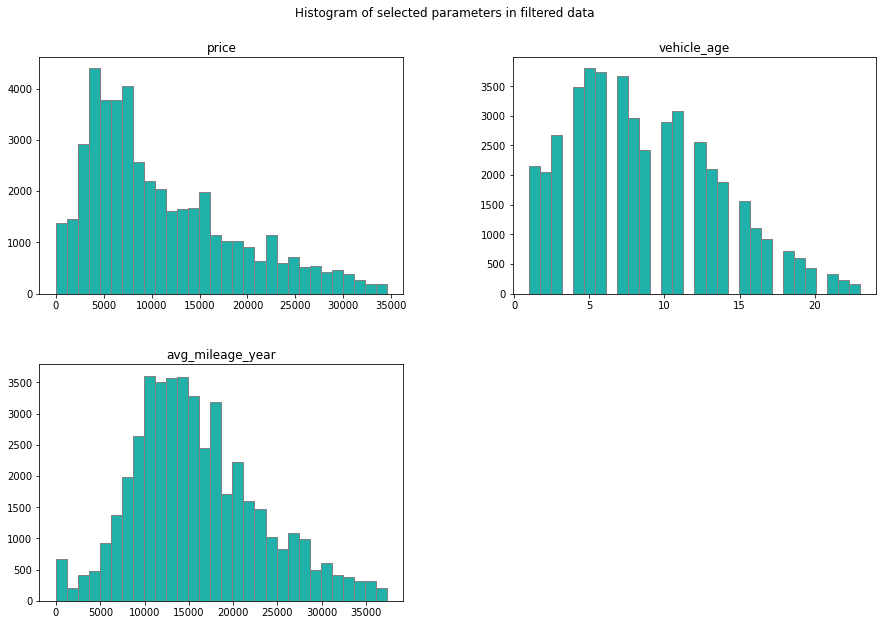

In [73]:
#histogram for filtered data
new_us_cars[['price', 'vehicle_age', 'avg_mileage_year']].hist(bins=30, figsize=(15, 10), color='lightseagreen',edgecolor = "gray", grid=False)
plt.suptitle('Histogram of selected parameters in filtered data', y=0.95);

### Ads lifetime

* We will calculate the ads lifetime looking at the new dataset we filtered. 
* We saw that the minimum days an ad was shown is 0 and the maximum 271, average of 40 days. 
* We will clean the data from outliers and add the clean info to our new dataset "new_us_cars"


In [74]:
#describe the data
round(new_us_cars['days_listed'].describe(), 0)

count    45559.0
mean        40.0
std         28.0
min          0.0
25%         19.0
50%         33.0
75%         53.0
max        271.0
Name: days_listed, dtype: float64

In [75]:
#check the value of outlier
Q1_days = new_us_cars['days_listed'].quantile(0.25)
Q3_days = new_us_cars['days_listed'].quantile(0.75)
IQR_days = Q3_days - Q1_days

#check the lowerbound and upperbound value
lower_days = Q1_days - (1.5*IQR_days)
upper_days = Q3_days + (1.5*IQR_days)

#show the value
print(lower_days)
print(upper_days)


-32.0
104.0


In [76]:
#saved data witout outliers
ad_days_new_us_cars = new_us_cars.query('0 < days_listed < 104')
ad_days_new_us_cars

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,avg_mileage_year,brand_name,condition_rank
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.29,bmw,2
1,25500,2013,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,5,17741.00,ford,2
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.33,hyundai,4
3,1500,2003,ford f-150,fair,8,gas,160954.0,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,10059.62,ford,1
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,2,6,2018,4,14488.50,chrysler,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51519,11750,2015,honda accord,excellent,4,gas,81195.0,automatic,coupe,unknown,0,2018-11-24,89,5,11,2018,3,27065.00,honda,3
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,2,10,2018,5,17627.20,nissan,4
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,3,11,2018,9,14222.22,hyundai,3
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,0,7,2018,5,27914.60,toyota,2


In [77]:
#new dataset 
round(ad_days_new_us_cars['days_listed'].describe(), 0)

count    43999.0
mean        37.0
std         23.0
min          1.0
25%         18.0
50%         32.0
75%         51.0
max        103.0
Name: days_listed, dtype: float64

In [78]:
#check the value of outlier
Q1_days_1 = ad_days_new_us_cars['days_listed'].quantile(0.25)
Q3_days_1 = ad_days_new_us_cars['days_listed'].quantile(0.75)
IQR_days_1 = Q3_days_1 - Q1_days_1

#check the lowerbound and upperbound value
lower_days_1 = round(Q1_days_1 - (1.5*IQR_days_1), 0)
upper_days_1 = round(Q3_days_1 + (1.5*IQR_days_1), 0)

#show the value
print(lower_days_1)
print(upper_days_1)

-32.0
100.0


array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

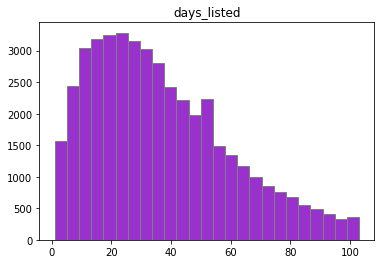

In [79]:
#distribiution of the amount of days the ads where exposed, after we cleaned up the data
ad_days_new_us_cars.hist('days_listed', bins= 25, color='darkorchid', edgecolor = "gray", grid=False)

<span style="color:green">**Notes from the analyst:** </span> 

After cleaning the data from the ads age, we can say that ads are too long exposed if is far above from our median, 40 days, and too short if they are less than 18 days

<span style="color:purple">**Actions taken:** </span>

We are dividing days_listed into 3 categories to better understand relationships between columns 
* 3 groups in a new column 'days_listed_range'. 
    * 1 - 'short' for 0-49 days 
    * 2 - 'medium' for 50-99 days 
    * 3 - 'long' for 100 to infinity (actually 271) days
* Many of the ads are short, for all types of car conditions

In [80]:
def create_days_range(days_listed:int) -> str:
    if days_listed < 50:
        return 'short'
    elif days_listed < 100:
        return 'medium'
    else:
        return 'long'

In [81]:
new_us_cars['days_listed_range'] = new_us_cars['days_listed'].apply(create_days_range)

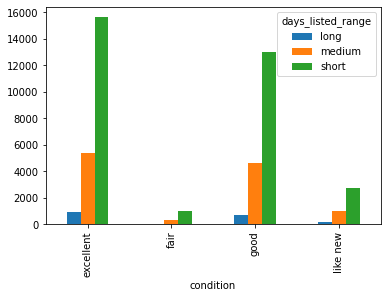

In [82]:
new_us_cars.pivot_table(
    index='days_listed_range',
    columns='condition',
    values='days_listed',
    aggfunc='count'
).transpose().plot(kind='bar')
plt.show()

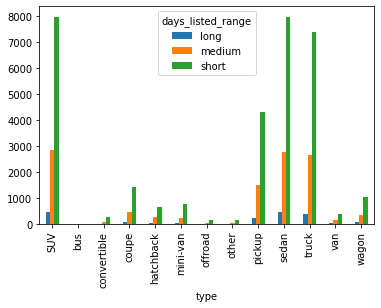

In [83]:
new_us_cars.pivot_table(
    index='days_listed_range',
    columns='type',
    values='condition_rank',
    aggfunc='count'
).transpose().plot(kind='bar')
plt.show()

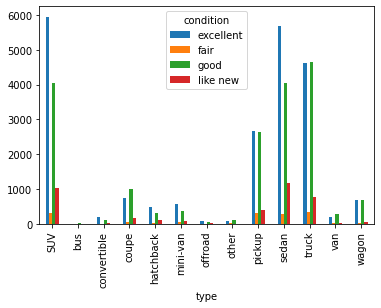

In [84]:
new_us_cars.pivot_table(
    index='condition',
    columns='type',
    values='days_listed',
    aggfunc='count'
).transpose().plot(kind='bar')
plt.show()

<span style="color:green">**Notes from the analyst:** </span> 

* We see our main and most popular vehicle types have the most amount of ads. 
* We will study each type: SUV, truck, Sedan and pickup to better understand the relationships and correlations with other columns and how thta affect our conclusions

### Average price per each type of vehicle

* We can see in the table below and the graph that Sedn and SUV models have the highest number of ads, which are both 2 types of cars very popular. 


In [85]:
#new table with vehicles types mean
vehicle_type_mean = new_us_cars.groupby(['type']).agg({
    'price' : 'mean',
    'model' : 'count'
}).rename(columns={
    'price' : 'avg_price',
    'model' : 'count_type'
}).sort_values(by='count_type', ascending=False)

vehicle_type_mean

,avg_price,count_type
type,,
SUV,10142.377475,11312
sedan,6727.562338,11189
truck,14606.425687,10402
pickup,14583.796862,5991
coupe,13162.888774,1933
wagon,8720.499656,1453
mini-van,7612.777251,1055
hatchback,6586.369703,944
van,8384.323970,534


Text(0.5, 0, 'Avegage Price and Ads Count per Model')

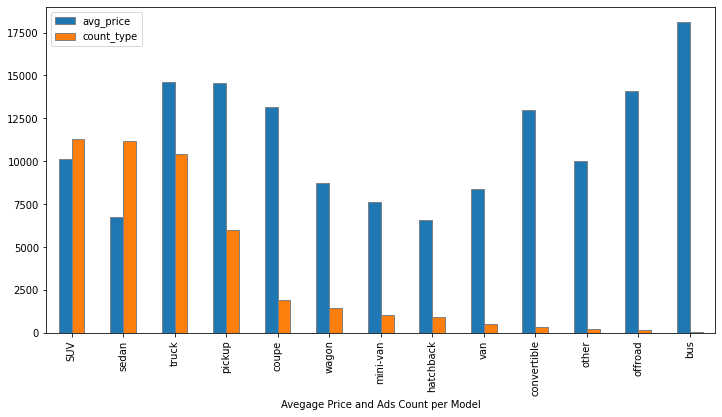

In [86]:
#show on a graph
vehicle_type_mean.plot(kind='bar', grid=False, figsize=(12, 6), edgecolor = "gray")
plt.xlabel('Avegage Price and Ads Count per Model')

### Price factors

Our most common car types are SUV, Trucks and Sedan. We will investigate whether the price depends on age, mileage, condition, transmission type, and color. 

For categorical variables (transmission type and color), we will plot box-and-whisker charts, and create scatterplots for the rest. And we won't consider categories that don't have at least 50 ads


In [87]:
# popular vehicles dataset
top_vehicles_filtered = new_us_cars.query('7 <= days_listed <= 100')
top_vehicles_filtered

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,avg_mileage_year,brand_name,condition_rank,days_listed_range
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.29,bmw,2,short
1,25500,2013,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,5,17741.00,ford,2,medium
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.33,hyundai,4,medium
3,1500,2003,ford f-150,fair,8,gas,160954.0,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,10059.62,ford,1,short
5,14990,2014,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,2,6,2018,4,14488.50,chrysler,3,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51519,11750,2015,honda accord,excellent,4,gas,81195.0,automatic,coupe,unknown,0,2018-11-24,89,5,11,2018,3,27065.00,honda,3,medium
51520,9249,2013,nissan maxima,like new,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,2,10,2018,5,17627.20,nissan,4,short
51522,3950,2009,hyundai sonata,excellent,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,3,11,2018,9,14222.22,hyundai,3,short
51523,7455,2013,toyota corolla,good,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,0,7,2018,5,27914.60,toyota,2,medium


#### SUV

In [88]:
#SUV dataset
suv_us_cars = new_us_cars.loc[new_us_cars['type'] == 'SUV'].reset_index(drop=True)
suv_us_cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,avg_mileage_year,brand_name,condition_rank,days_listed_range
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.29,bmw,2,short
1,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,0,1,2019,6,18245.50,honda,3,medium
2,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,0,7,2018,6,17362.33,kia,3,short
3,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,4,2,2019,11,13381.00,honda,3,short
4,12990,2009,gmc yukon,excellent,8,gas,132285.0,automatic,SUV,black,1,2019-01-31,24,3,1,2019,10,13228.50,gmc,3,short


In [89]:
#correlation with price
round(suv_us_cars.corr()['price'], 2)

price               1.00
model_year          0.57
cylinders           0.01
odometer           -0.52
is_4wd              0.11
days_listed        -0.02
weekday_posted      0.01
month_posted       -0.02
year_posted         0.02
vehicle_age        -0.57
avg_mileage_year    0.25
condition_rank      0.27
Name: price, dtype: float64

In [90]:
#values of ads based on transmission
suv_us_cars['transmission'].value_counts()

automatic    10720
manual         457
other          135
Name: transmission, dtype: int64

In [91]:
#values of ads based on colors
suv_us_cars['paint_color'].value_counts()

unknown    2027
black      1977
white      1756
silver     1458
grey       1088
blue        965
red         842
green       407
brown       351
custom      289
orange       74
yellow       40
purple       38
Name: paint_color, dtype: int64

In [92]:
#remove values with less than 50 ads
new_list_suv = list(suv_us_cars['paint_color'].value_counts()[:-2].index)

#create a new dataset for analysis
color_suv = suv_us_cars[suv_us_cars['paint_color'].isin(new_list_suv)].reset_index(drop=True)
color_suv

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,avg_mileage_year,brand_name,condition_rank,days_listed_range
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.29,bmw,2,short
1,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,0,1,2019,6,18245.50,honda,3,medium
2,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,0,7,2018,6,17362.33,kia,3,short
3,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,4,2,2019,11,13381.00,honda,3,short
4,12990,2009,gmc yukon,excellent,8,gas,132285.0,automatic,SUV,black,1,2019-01-31,24,3,1,2019,10,13228.50,gmc,3,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11229,9500,2012,chevrolet traverse,good,6,gas,144500.0,automatic,SUV,unknown,1,2019-03-05,1,1,3,2019,7,20642.86,chevrolet,2,short
11230,4999,2002,toyota 4runner,excellent,6,gas,177901.0,automatic,SUV,unknown,1,2018-05-26,59,5,5,2018,16,11118.81,toyota,3,medium
11231,6995,2012,buick enclave,excellent,6,gas,157000.0,automatic,SUV,white,1,2018-08-04,17,5,8,2018,6,26166.67,buick,3,short
11232,7995,2011,chevrolet equinox,like new,4,gas,111088.0,automatic,SUV,unknown,0,2019-04-01,175,0,4,2019,8,13886.00,chevrolet,4,long


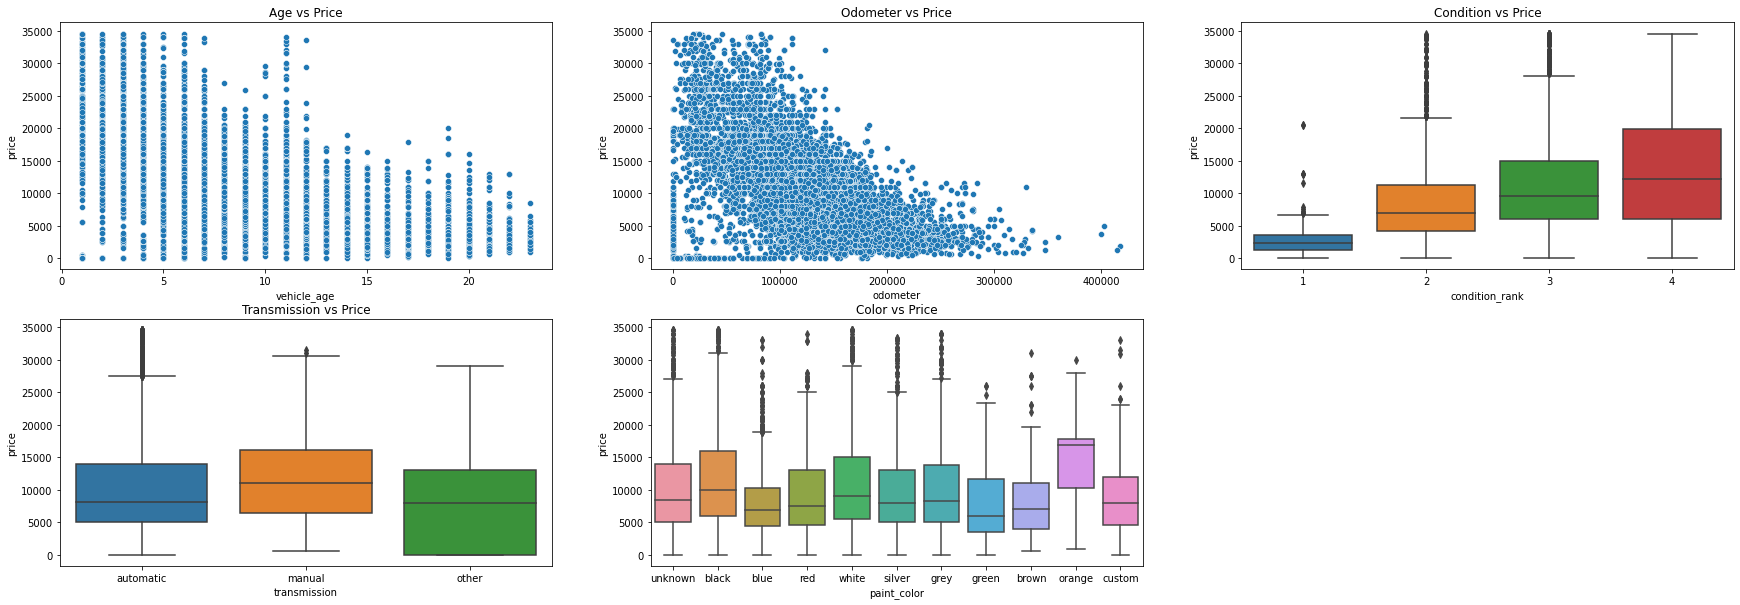

In [93]:

#create some graphs
plt.figure(figsize=(30, 10))

plt.subplot(2, 3, 1)
plt.title('Age vs Price')
sns.scatterplot(data=suv_us_cars, x='vehicle_age', y='price')

plt.subplot(2, 3, 2)
plt.title('Odometer vs Price')
sns.scatterplot(data=suv_us_cars, x='odometer', y='price')

plt.subplot(2, 3, 3)
plt.title('Condition vs Price')
sns.boxplot(data=suv_us_cars, x='condition_rank', y='price')

plt.subplot(2, 3, 4)
plt.title('Transmission vs Price')
sns.boxplot(data=suv_us_cars, x='transmission', y='price')

plt.subplot(2, 3, 5)
plt.title('Color vs Price')
sns.boxplot(data=color_suv, x='paint_color', y='price')

plt.show()

<span style="color:green">**Notes from the analyst:** </span> 


* Age parameter constitutes the biggest influence in the price, as expected, the older the car, the lower the car
* Mileage also affects for the same reasons, the longer the car traveled, the price decreases for that car, it devaluates more
* As expected, the better the condition, the higher the price
* SUV with manual transmition have the highest price. This also makes sense, as majority of cars in the US are automatic, so having a manual car means to order it special like that, which increases the prices. 
* Color is something very personal and has no correlation


#### Sedan

In [94]:
#SUV dataset
sedan_us_cars = new_us_cars.loc[new_us_cars['type'] == 'SUV'].reset_index(drop=True)
sedan_us_cars.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,avg_mileage_year,brand_name,condition_rank,days_listed_range
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.29,bmw,2,short
1,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,0,1,2019,6,18245.50,honda,3,medium
2,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,0,7,2018,6,17362.33,kia,3,short
3,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,4,2,2019,11,13381.00,honda,3,short
4,12990,2009,gmc yukon,excellent,8,gas,132285.0,automatic,SUV,black,1,2019-01-31,24,3,1,2019,10,13228.50,gmc,3,short


In [95]:
#correlation with price
round(sedan_us_cars.corr()['price'], 2)

price               1.00
model_year          0.57
cylinders           0.01
odometer           -0.52
is_4wd              0.11
days_listed        -0.02
weekday_posted      0.01
month_posted       -0.02
year_posted         0.02
vehicle_age        -0.57
avg_mileage_year    0.25
condition_rank      0.27
Name: price, dtype: float64

In [96]:
#values of ads based on transmission
sedan_us_cars['transmission'].value_counts()

automatic    10720
manual         457
other          135
Name: transmission, dtype: int64

In [97]:
#values of ads based on colors
sedan_us_cars['paint_color'].value_counts()

unknown    2027
black      1977
white      1756
silver     1458
grey       1088
blue        965
red         842
green       407
brown       351
custom      289
orange       74
yellow       40
purple       38
Name: paint_color, dtype: int64

In [98]:
#remove values with less than 50 ads
new_list_sedan = list(sedan_us_cars['paint_color'].value_counts()[:-2].index)

#create a new dataset for analysis
color_sedan = sedan_us_cars[sedan_us_cars['paint_color'].isin(new_list_sedan)].reset_index(drop=True)
color_sedan

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,avg_mileage_year,brand_name,condition_rank,days_listed_range
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.29,bmw,2,short
1,15990,2013,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1,2019-01-07,68,0,1,2019,6,18245.50,honda,3,medium
2,11500,2012,kia sorento,excellent,4,gas,104174.0,automatic,SUV,unknown,1,2018-07-16,19,0,7,2018,6,17362.33,kia,3,short
3,9200,2008,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1,2019-02-15,17,4,2,2019,11,13381.00,honda,3,short
4,12990,2009,gmc yukon,excellent,8,gas,132285.0,automatic,SUV,black,1,2019-01-31,24,3,1,2019,10,13228.50,gmc,3,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11229,9500,2012,chevrolet traverse,good,6,gas,144500.0,automatic,SUV,unknown,1,2019-03-05,1,1,3,2019,7,20642.86,chevrolet,2,short
11230,4999,2002,toyota 4runner,excellent,6,gas,177901.0,automatic,SUV,unknown,1,2018-05-26,59,5,5,2018,16,11118.81,toyota,3,medium
11231,6995,2012,buick enclave,excellent,6,gas,157000.0,automatic,SUV,white,1,2018-08-04,17,5,8,2018,6,26166.67,buick,3,short
11232,7995,2011,chevrolet equinox,like new,4,gas,111088.0,automatic,SUV,unknown,0,2019-04-01,175,0,4,2019,8,13886.00,chevrolet,4,long


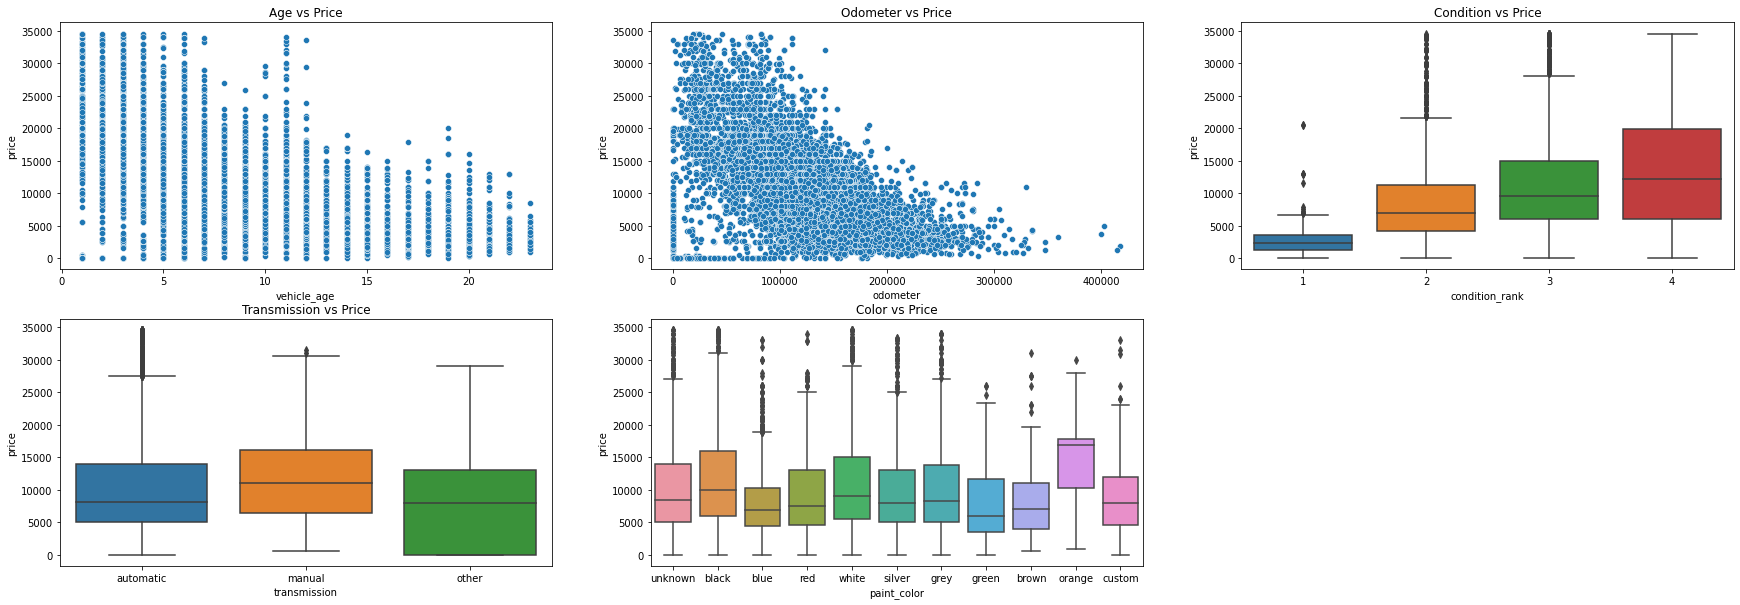

In [99]:

#create some graphs
plt.figure(figsize=(30, 10))

plt.subplot(2, 3, 1)
plt.title('Age vs Price')
sns.scatterplot(data=sedan_us_cars, x='vehicle_age', y='price')

plt.subplot(2, 3, 2)
plt.title('Odometer vs Price')
sns.scatterplot(data=sedan_us_cars, x='odometer', y='price')

plt.subplot(2, 3, 3)
plt.title('Condition vs Price')
sns.boxplot(data=sedan_us_cars, x='condition_rank', y='price')

plt.subplot(2, 3, 4)
plt.title('Transmission vs Price')
sns.boxplot(data=sedan_us_cars, x='transmission', y='price')

plt.subplot(2, 3, 5)
plt.title('Color vs Price')
sns.boxplot(data=color_sedan, x='paint_color', y='price')

plt.show()

<span style="color:green">**Notes from the analyst:** </span> 


* As happened with SUV type, the older the car, lower the price
* Same happens like with SUV for mileage, condition.

* Either transmision and color have no correlation, ans we can again conlcude the automatic cars are more extended than manual, so makes sense manual cars will be more expensive


## General conclusion


After reading, understanding and cleaning the data, we can conclude on:

* The dataset had several missing values in several column. Those missing values where filled with average, medians or the most common values based on different conditions
* Some straight forward filling of missing values where:
     * `is_4wd`, replaced with 0, to have a True/False kind of column
     * `paint_color`, where NAN values became 'unknown'
* We did not have to deal with any duplicated values     
* We had some outliers in our original dataset, so we created cleaned and filtered datasets to do our analysis. After analyzing the clean data, we conclude:

    1. Cars age and mileage have the biggest impact on the prices
    2. The condition of the car is also considered as a big impact on the prices, as the better condition, the higher the price
    3. Color has no correlation with price, as is something pretty personal, though, we thought maybe red cars might have higher prices, since in some countries, red cars have more probabilities of having accidents, therefore, the prices and the insurance for them is usually higher. 
